<a href="https://colab.research.google.com/github/fzambran/primeros-pasos-en-python/blob/main/dds_python_clase_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://datascience.uc.cl/images/workshop/python.png" width="500">

* Más información sobre nuestros programas en el siguiente [link](https://datascience.uc.cl/).
* Clases grabadas: [link](https://vimeo.com/user105597673).

## Clase 3: Análisis de Datos con Pandas

### Contenidos
* [Análisis Exploratorio de Datos](#analisis-exploratorio-de-datos).
* [¿Qué es Pandas?](#que-es-pandas).
* [Estructura DataFrame y Series](#estructura-dataframe-y-series).
* [Carga de datasets](#carga-de-datasets).
* [Análisis Inicial de Datos](#analisis-inicial-de-datos).
* [Subconjuntos de columnas en DataFrames](#subconjuntos-de-columnas-en-dataframes).
* [Selección de filas en DataFrames](#selección-de-filas-en-dataframes).
* [Creación y edición de variables](#creacion-y-edicion-de-variables).
* [Resumen de variables](#resumen-de-variables).
* [Frecuencias dentro de variables](#frecuencias-dentro-de-variables).
* [Ejercicios de práctica](#ejercicios-de-practica).

<a id="analisis-exploratorio-de-datos"></a>
### Análisis Exploratorio de Datos

<img src="https://datos.gob.es/sites/default/files/u322/grafico-guia_0.jpg" height="300">

* Abarca la manipulación de datos con el fin de explorar, investigar y aprender. 
* Es un trabajo detectivesco.
* Involucra estadísticas de resumen como la media, total (o suma), desviación estándar y frecuencias. También incluye gráficos (véase _Clase 4_).
* No está hecho para evidenciar hipótesis, para ello se necesitan herramientas estadísticas de mayor complejidad respecto a las que hemos aprendido.
* Algunos objetivos típicos del análisis exploratorio son: _Distribución de los datos_, _Relación entre variables_, _Encontrar valores atípicos_, _Encontrar patrones_, etc.
* Ayuda a comprender de mejor forma interrogantes como: _¿En qué día de la semana se producen menos ventas?_ _¿Cuáles son las características del producto más vendido?_ _¿Qué tipo de clientes tengo?_ _¿Ha tenido éxito una determinada campaña de Marketing?_ (siempre y cuando que se cuente con la información que permita hacerlo).

<a id="que-es-pandas"></a>
### ¿Qué es Pandas?
<img src="https://www.kindpng.com/picc/b/574-5747046_pandas-png.png" width="500">

* Es una librería escrita como extensión de NumPy para manipulación y análisis de datos.
* Fue desarrollada en 2008 con el propósito de manejar series de tiempo. Su nombre se puede descomponer como _Panel Data_.
* Por convención se importa con el alias `pd`.
* Tiene soporte para cargar y guardar archivos fuera de Python.
* Tiene una performance bastante aceptable al estar desarrollada bajo _Cython_ (Uso de Python bajo el lenguaje C).
* Rápida conexión con otras librerías como `NumPy`, `Matplotlib`, `SciPy` y `scikit-learn`.
* Soporte para transformación de datos.
* Manejo de datos faltantes.
* Documentación: <https://pandas.pydata.org/docs/>.
* Etc.

<a id="estructura-dataframe-y-series"></a>
### Estructura DataFrame y Series

* `Series`: Estructura de datos unidimensional con un conjunto de datos asociados a un índice. Se puede crear directamente desde un `array` o una `lista`.
* `DataFrame`: Es una extensión de las `Series`. Mientras que un objecto `Series` contiene dos componentes: un set de valores e índices asociados, el `DataFrame` contiene tres componentes: Eje 0 (filas), Eje 1 (columnas) e índices asociados a cada fila. Su estructura básica es el `array` de NumPy. Se puede crear directamente desde un `diccionario`.
* Para una visualización correcta de `DataFrame`s, cambiaremos `print` por `display`, una función propia de Jupyter (lo que estamos usando ahora para crear nuestro código).

In [ ]:
# Ejemplo de crear Series
# Recordatorio de importar pandas
import pandas as pd
precios = [1000, 2000, 1500, 300, 600, 500, 5000]
precios_serie = pd.Series(precios)
print(precios_serie)

0    1000
1    2000
2    1500
3     300
4     600
5     500
6    5000
dtype: int64


In [ ]:
# Ejemplo de crear DataFrame a partir de un diccionario.
diccionario = {
    "País"         : ["Chile", "Argentina", "Bolivia", "Perú", "Brasil"],
    "Mundiales"    : [0, 2, 0, 0, 5],
    "Copas América": [2, 15, 1, 2, 9]
}
diccionario_a_dataframe = pd.DataFrame(diccionario)
display(diccionario_a_dataframe)

,País,Mundiales,Copas América
0,Chile,0,2
1,Argentina,2,15
2,Bolivia,0,1
3,Perú,0,2
4,Brasil,5,9


In [ ]:
datos = [
    {"cancion": "Yonaguni", "artista": "Bad Bunny", "reproducciones": "25,030,128"},
    {"cancion": "TE DESEO LO MEJOR", "artista": "Bad Bunny", "reproducciones": "6,204,228"},
    {"cancion": "Jeans", "artista": "Justin Quiles", "reproducciones": "5,145,966"},
    {"cancion": "Ponte Pa' Mi", "artista": "Justin Quiles", "reproducciones": "5,082,870"},
]

datos_a_dataframe = pd.DataFrame(datos)
display(datos_a_dataframe)

,cancion,artista,reproducciones
0,Yonaguni,Bad Bunny,"25,030,128"
1,TE DESEO LO MEJOR,Bad Bunny,"6,204,228"
2,Jeans,Justin Quiles,"5,145,966"
3,Ponte Pa' Mi,Justin Quiles,"5,082,870"


* Además, podemos asignar una columna como índice, cumpliendo la función de _Identificador_ dentro del conjunto de datos.
* Esto facilita el filtro e identificación de filas.

In [ ]:
# Ejemplo de aplicar índice
dict_a_df_indice = diccionario_a_dataframe.set_index("País")
display(dict_a_df_indice)

,Mundiales,Copas América
País,,
Chile,0,2
Argentina,2,15
Bolivia,0,1
Perú,0,2
Brasil,5,9


In [ ]:
dict_a_df_indice.loc["Argentina":"Bolivia", :]

,Mundiales,Copas América
País,,
Argentina,2,15
Bolivia,0,1


<a id="carga-de-datasets"></a>
### Carga de datasets
* `pandas` puede leer datos desde una gran variedad de formatos usando sus funciones de carga.
* Algunas de estas funciones son `pd.read_csv`, `pd.read_table`, `pd.read_excel`, `pd.read_html` y `pd.read_stata`.
* Podemos indicar varios argumentos como `columns`, `parse_dates` e `index_col`.
* Además, accedemos a las cinco primeras entradas de las bases de datos cargadas con el método `head`. 

Caguemos la base de datos `superstore.csv`, que muestra datos sobre una famosa cadena de Retail ubicada en Estados Unidos.

In [ ]:
# Ejemplo de cargar bases de datos
data_raw = pd.read_csv("superstore.csv", parse_dates=["Order Date"], index_col="Transaction ID")
display(data_raw.head())

,Order ID,Customer ID,Product Name,Sub-Category,Category,Discount,Order Date,Order Day,Order Month,Order Weekday,Order Year,Quantity,Segment,State,Profit CLP,Sales CLP
Transaction ID,,,,,,,,,,,,,,,,
21865-109365-13542,109365,21865,Xerox 22,Paper,Office Supplies,0.0,2016-11-03,3,11,Thursday,2016,3,Consumer,California,7267,15139
15745-162026-16405,162026,15745,Xerox 1925,Paper,Office Supplies,0.0,2016-10-08,8,10,Saturday,2016,2,Consumer,California,21713,48251
10090-136448-10461,136448,10090,Logitech 910-002974 M325 Wireless Mouse for We...,Accessories,Technology,0.2,2017-09-16,16,9,Saturday,2017,2,Consumer,Pennsylvania,11210,37368
16525-142993-23814,142993,16525,"Contico 72""H Heavy-Duty Storage System",Storage,Office Supplies,0.0,2015-10-12,12,10,Monday,2015,2,Consumer,Washington,0,63826
15280-115819-4927,115819,15280,PowerGen Dual USB Car Charger,Phones,Technology,0.2,2016-04-19,19,4,Tuesday,2016,5,Consumer,California,10114,31119


* Además, muchas librerías de python ofrecen datasets para practicar.

In [ ]:
# Ejemplo de cargar un DataFrame desde seaborn
import seaborn as sns
titanic = sns.load_dataset("titanic")
display(titanic.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


<a id="analisis-inicial-de-datos"></a>
### Análisis Inicial de Datos

* Es necesario para obtener una perspectiva general nuestros datos.
* Obtenemos una descripción cuantitativa con el método `describe()`.
* Visualizamos tipos de variables y datos faltantes con el método `info()`.
* Obtenemos columnas de la base de datos con la instancia `columns`.
* Las dimensiones de la base de datos las obtenemos con la instancia `shape`.

In [ ]:
# Uso de describe
display(data_raw.describe().T)

,count,mean,std,min,25%,50%,75%,max
Order ID,9993.0,134437.893525,20252.558140,100006.0,117156.0,133613.0,152072.0,169999.0
Customer ID,9993.0,16037.562294,3429.030030,10015.0,13045.0,16120.0,18985.0,21925.0
Discount,9993.0,0.156188,0.206457,0.0,0.0,0.2,0.2,0.8
Order Day,9993.0,15.467727,8.748441,1.0,8.0,15.0,23.0,31.0
Order Month,9993.0,7.810067,3.284598,1.0,5.0,9.0,11.0,12.0
Order Year,9993.0,2015.722406,1.123479,2014.0,2015.0,2016.0,2017.0,2017.0
Quantity,9993.0,3.789753,2.225149,1.0,2.0,3.0,5.0,14.0
Profit CLP,9993.0,22319.731112,182438.910151,-5139733.0,1348.0,6753.0,22867.0,6541481.0
Sales CLP,9993.0,178997.910838,485376.239720,346.0,13457.0,42426.0,163491.0,17629716.0


In [ ]:
# Uso de info
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 21865-109365-13542 to 10720-136322-29264
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9993 non-null   int64         
 1   Customer ID    9993 non-null   int64         
 2   Product Name   9993 non-null   object        
 3   Sub-Category   9993 non-null   object        
 4   Category       9993 non-null   object        
 5   Discount       9993 non-null   float64       
 6   Order Date     9993 non-null   datetime64[ns]
 7   Order Day      9993 non-null   int64         
 8   Order Month    9993 non-null   int64         
 9   Order Weekday  9993 non-null   object        
 10  Order Year     9993 non-null   int64         
 11  Quantity       9993 non-null   int64         
 12  Segment        9993 non-null   object        
 13  State          9993 non-null   object        
 14  Profit CLP     9993 non-null   int64         


In [ ]:
# Uso de columns
print(data_raw.columns)

Index(['Order ID', 'Customer ID', 'Product Name', 'Sub-Category', 'Category',
       'Discount', 'Order Date', 'Order Day', 'Order Month', 'Order Weekday',
       'Order Year', 'Quantity', 'Segment', 'State', 'Profit CLP',
       'Sales CLP'],
      dtype='object')


In [ ]:
# Uso de shape
print(data_raw.shape)

(9993, 16)


<a id="subconjuntos-de-columnas-en-dataframes"></a>
### Subconjuntos de columnas en DataFrames

* Contamos con cuatro formas de hacerlo:
* __Incorporar subsetting directamente__: `datos[listado_de_columnas]`.
* __De acuerdo a su localización__: `datos.loc[nombre_indices, nombre_columnas]`.
* __De acuerdo a su índice__: `datos.iloc[lista_con_indices_de_filas, lista_con_indices_de_columnas]`.
* __Eliminar columnas__: `datos.drop(columns=columnas_a_eliminar)`.
* Si seleccionamos solo una variable, obtendremos un objeto del tipo `Series`.

In [ ]:
# Ejemplo 1: Seleccionar la columna 'Product Name'
print(data_raw["Product Name"])

Transaction ID
21865-109365-13542                                             Xerox 22
15745-162026-16405                                           Xerox 1925
10090-136448-10461    Logitech 910-002974 M325 Wireless Mouse for We...
16525-142993-23814               Contico 72"H Heavy-Duty Storage System
15280-115819-4927                         PowerGen Dual USB Car Charger
                                            ...                        
13540-132521-3244     Belkin 8 Outlet SurgeMaster II Gold Surge Prot...
17560-143105-12682    Hewlett Packard 610 Color Digital Copier / Pri...
12250-149811-16023    GBC Standard Recycled Report Covers, Clear Pla...
10300-166800-21126    Hoover Commercial Soft Guard Upright Vacuum An...
10720-136322-29264                         GBC Personal VeloBind Strips
Name: Product Name, Length: 9993, dtype: object


In [ ]:
print(data_raw.columns)

Index(['Order ID', 'Customer ID', 'Product Name', 'Sub-Category', 'Category',
       'Discount', 'Order Date', 'Order Day', 'Order Month', 'Order Weekday',
       'Order Year', 'Quantity', 'Segment', 'State', 'Profit CLP',
       'Sales CLP'],
      dtype='object')


In [ ]:
# Ejemplo 2: Seleccionar las columnas que comiencen con la palabra 'Order'
columnas_order = [col for col in data_raw.columns if col[:5] == "Order"]
# print(columnas_order)
display(data_raw[columnas_order].head())

,Order ID,Order Date,Order Day,Order Month,Order Weekday,Order Year
Transaction ID,,,,,,
21865-109365-13542,109365,2016-11-03,3,11,Thursday,2016
15745-162026-16405,162026,2016-10-08,8,10,Saturday,2016
10090-136448-10461,136448,2017-09-16,16,9,Saturday,2017
16525-142993-23814,142993,2015-10-12,12,10,Monday,2015
15280-115819-4927,115819,2016-04-19,19,4,Tuesday,2016


In [ ]:
display(data_raw.loc[:, columnas_order].head())
                    # FILAS , COLUMNAS
display(data_raw.drop(columns=columnas_order).head())
# data_raw = data_raw.drop(columns=columnas_order)

,Order ID,Order Date,Order Day,Order Month,Order Weekday,Order Year
Transaction ID,,,,,,
21865-109365-13542,109365,2016-11-03,3,11,Thursday,2016
15745-162026-16405,162026,2016-10-08,8,10,Saturday,2016
10090-136448-10461,136448,2017-09-16,16,9,Saturday,2017
16525-142993-23814,142993,2015-10-12,12,10,Monday,2015
15280-115819-4927,115819,2016-04-19,19,4,Tuesday,2016


,Customer ID,Product Name,Sub-Category,Category,Discount,Quantity,Segment,State,Profit CLP,Sales CLP
Transaction ID,,,,,,,,,,
21865-109365-13542,21865,Xerox 22,Paper,Office Supplies,0.0,3,Consumer,California,7267,15139
15745-162026-16405,15745,Xerox 1925,Paper,Office Supplies,0.0,2,Consumer,California,21713,48251
10090-136448-10461,10090,Logitech 910-002974 M325 Wireless Mouse for We...,Accessories,Technology,0.2,2,Consumer,Pennsylvania,11210,37368
16525-142993-23814,16525,"Contico 72""H Heavy-Duty Storage System",Storage,Office Supplies,0.0,2,Consumer,Washington,0,63826
15280-115819-4927,15280,PowerGen Dual USB Car Charger,Phones,Technology,0.2,5,Consumer,California,10114,31119


<a id="seleccion-de-filas-en-dataframes"></a>
### Selección de filas en DataFrames
* También contamos con distintas formas de hacerlo.
* __A través de su indice nombrado__: `datos.loc[indicenom_inf:indicenom_sup, columnas]` (ventaja de poder seleccionar columnas al mismo tiempo).
* __A través de su índice numérico__: `datos.loc[indicenum_inf:indicenum_sup, columnas]`.
* No es un filtro, solo selecciona filas de arriba hacia abajo.
* Otro de estas funciones es indicar un order nombrado o númerico manualmente.

In [ ]:
# Ejemplo 1: Seleccionar desde la transacción "19150-111353-23618" hasta la "10060-134173-9138"
display(data_raw.loc["19150-111353-23618":"10060-134173-9138", :])

,Order ID,Customer ID,Product Name,Sub-Category,Category,Discount,Order Date,Order Day,Order Month,Order Weekday,Order Year,Quantity,Segment,State,Profit CLP,Sales CLP
Transaction ID,,,,,,,,,,,,,,,,
19150-111353-23618,111353,19150,Avery 485,Labels,Office Supplies,0.0,2014-11-29,29,11,Saturday,2014,2,Consumer,New York,9172,19515
19720-149762-24005,149762,19720,Hon 4060 Series Tables,Tables,Furniture,0.2,2016-12-03,3,12,Saturday,2016,3,Consumer,California,5231,209253
17275-107818-14646,107818,17275,Prang Colored Pencils,Art,Office Supplies,0.0,2014-09-08,8,9,Monday,2014,2,Consumer,Washington,2061,4579
12895-139738-23068,139738,12895,Boston KS Multi-Size Manual Pencil Sharpener,Art,Office Supplies,0.2,2015-09-25,25,9,Friday,2015,7,Consumer,Illinois,10026,100259
10060-134173-9138,134173,10060,Xerox 231,Paper,Office Supplies,0.2,2017-09-16,16,9,Saturday,2017,4,Home Office,Pennsylvania,5652,16148


In [ ]:
# Ejemplo 2: Seleccionar filas 100 a 200 y columas 10 a la 13
display(data_raw.iloc[100:201, 10:14])

,Order Year,Quantity,Segment,State
Transaction ID,,,,
14185-160486-27821,2016,4,Consumer,Florida
16885-145583-414,2016,3,Consumer,California
16210-159506-22985,2017,6,Corporate,Indiana
11035-120901-18113,2015,2,Consumer,Texas
12085-167402-19975,2017,3,Corporate,Missouri
...,...,...,...,...
14095-159499-23178,2015,2,Corporate,Arizona
18640-108259-26059,2015,1,Corporate,North Carolina
15415-166828-28100,2014,2,Consumer,Missouri


In [ ]:
display(data_raw.iloc[:5, -2:]) # Primeras 5 observaciones y últimas 2 variables

,Profit CLP,Sales CLP
Transaction ID,,
21865-109365-13542,7267,15139
15745-162026-16405,21713,48251
10090-136448-10461,11210,37368
16525-142993-23814,0,63826
15280-115819-4927,10114,31119


* Además, para seleccionar filas podemos usar filtros, esto es seleccionar solo las que cumplan cierta condición.
* Algunas formas son las siguientes:
* __Escribir directamente la condición__: `datos[condición]`. (para consultas más complejas)
* __A través del método loc__: `datos.loc[condicion, columnas]`
* __Método query__: `datos.query("condicion")`. (para consultas más sencillas)
* __Importante__: los operadores `and` y `or` en pandas son reemplazados por `&` y `|` y las condiciones deben estar entre parentesis.

In [ ]:
# Ejemplo 1: Filtrar transacciones realizadas en el estado de New York
condicion = data_raw["State"] == "New York"
print(condicion)
display(data_raw[condicion].head())

Transaction ID
21865-109365-13542    False
15745-162026-16405    False
10090-136448-10461    False
16525-142993-23814    False
15280-115819-4927     False
                      ...  
13540-132521-3244     False
17560-143105-12682     True
12250-149811-16023    False
10300-166800-21126    False
10720-136322-29264    False
Name: State, Length: 9993, dtype: bool


,Order ID,Customer ID,Product Name,Sub-Category,Category,Discount,Order Date,Order Day,Order Month,Order Weekday,Order Year,Quantity,Segment,State,Profit CLP,Sales CLP
Transaction ID,,,,,,,,,,,,,,,,
18400-160857-16986,160857,18400,DAX Black Cherry Wood-Tone Poster Frame,Furnishings,Furniture,0.0,2015-05-08,8,5,Friday,2015,3,Consumer,New York,23508,61864
11245-168410-15888,168410,11245,9-3/4 Diameter Round Wall Clock,Furnishings,Furniture,0.0,2016-02-21,21,2,Sunday,2016,5,Corporate,New York,22552,53695
12010-128818-6714,128818,12010,Bady BDG101FRU Card Printer,Machines,Technology,0.0,2016-05-07,7,5,Saturday,2016,5,Consumer,New York,903339,3114961
20335-161718-10222,161718,20335,Global Leather Highback Executive Chair with P...,Chairs,Furniture,0.1,2015-12-04,4,12,Friday,2015,2,Consumer,New York,53214,281724
20365-100111-18197,100111,20365,"TOPS ""Important Message"" Pads, Canary, 4-1/4 x...",Paper,Office Supplies,0.0,2017-09-20,20,9,Wednesday,2017,9,Consumer,New York,14099,29997


In [ ]:
# Usando método query
display(data_raw.query("State == 'New York'").head())

,Order ID,Customer ID,Product Name,Sub-Category,Category,Discount,Order Date,Order Day,Order Month,Order Weekday,Order Year,Quantity,Segment,State,Profit CLP,Sales CLP
Transaction ID,,,,,,,,,,,,,,,,
18400-160857-16986,160857,18400,DAX Black Cherry Wood-Tone Poster Frame,Furnishings,Furniture,0.0,2015-05-08,8,5,Friday,2015,3,Consumer,New York,23508,61864
11245-168410-15888,168410,11245,9-3/4 Diameter Round Wall Clock,Furnishings,Furniture,0.0,2016-02-21,21,2,Sunday,2016,5,Corporate,New York,22552,53695
12010-128818-6714,128818,12010,Bady BDG101FRU Card Printer,Machines,Technology,0.0,2016-05-07,7,5,Saturday,2016,5,Consumer,New York,903339,3114961
20335-161718-10222,161718,20335,Global Leather Highback Executive Chair with P...,Chairs,Furniture,0.1,2015-12-04,4,12,Friday,2015,2,Consumer,New York,53214,281724
20365-100111-18197,100111,20365,"TOPS ""Important Message"" Pads, Canary, 4-1/4 x...",Paper,Office Supplies,0.0,2017-09-20,20,9,Wednesday,2017,9,Consumer,New York,14099,29997


In [ ]:
# Ejemplo 2: Seleccionar transacciones que fueron entre navidad y año nuevo, independiente del año.
# print(data_raw["Order Date"].dt.month) # Obtener año
condicion1 = data_raw["Order Date"].dt.month == 12
condicion2 = data_raw["Order Date"].dt.day > 25
condicion = condicion1 & condicion2  # &=and   |=or
                              
# print(condicion)
data_raw[condicion]

,Order ID,Customer ID,Product Name,Sub-Category,Category,Discount,Order Date,Order Day,Order Month,Order Weekday,Order Year,Quantity,Segment,State,Profit CLP,Sales CLP
Transaction ID,,,,,,,,,,,,,,,,
12565-135580-17966,135580,12565,2300 Heavy-Duty Transfer File Systems by Perma,Storage,Office Supplies,0.0,2015-12-30,30,12,Wednesday,2015,3,Consumer,California,11088,58360
14185-160486-27821,160486,14185,Embossed Ink Jet Note Cards,Paper,Office Supplies,0.2,2016-12-30,30,12,Friday,2016,4,Consumer,Florida,19686,56244
11035-120901-18113,120901,11035,Stockwell Push Pins,Fasteners,Office Supplies,0.2,2015-12-31,31,12,Thursday,2015,2,Consumer,Texas,441,2716
13960-119697-512,119697,13960,Lenovo 17-Key USB Numeric Keypad,Accessories,Technology,0.2,2015-12-28,28,12,Monday,2015,2,Consumer,Pennsylvania,1059,42352
15490-106334-13749,106334,15490,Bevis Steel Folding Chairs,Chairs,Furniture,0.2,2014-12-27,27,12,Saturday,2014,3,Consumer,California,17933,179331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16555-160395-3537,160395,16555,"Crayola Anti Dust Chalk, 12/Pack",Art,Office Supplies,0.0,2016-12-31,31,12,Saturday,2016,2,Corporate,Nevada,1276,2835
14665-136539-2910,136539,14665,Stanley Bostitch Contemporary Electric Pencil ...,Art,Office Supplies,0.2,2017-12-28,28,12,Thursday,2017,2,Consumer,Texas,2116,21157
16375-133592-23342,133592,16375,Xerox 1917,Paper,Office Supplies,0.0,2014-12-31,31,12,Wednesday,2014,4,Home Office,Rhode Island,71607,152355


<a id="creacion-y-edicion-de-variables"></a>
### Creación y edición de variables
* En ciertas ocaciones, crear columnas a través de las que ya tenemos disponibles nos ayuda a comprender de mejor forma nuestro conjunto de datos.
* Aplicar nuestros conocimientos previos es de suma relevancia para crear columnas con información útil para el análisis.
* **Ejemplos**: Transformar dólares a pesos chilenos o viceversa, crear una columna que me indique si la fecha es víspera de las fiestas de fin de año, variable que me índique si es feriado o fin de semana, o si el monto de la venta es inferior a lo esperado.

Función útil para crear categorías:

```python
import numpy as np
datos["nombre_columna_nueva"] = np.where(condicion, valor_si_True, valor_si_False)

```

In [ ]:
# Ejemplo 1: Crear una variable que sea 'Yes' si la fecha es fin de semana, 'No' en caso contrario.
import numpy as np
condicion = data_raw["Order Weekday"].isin(["Saturday", "Sunday"])
data_raw["Is Weekend"] = np.where(condicion, "Yes", "No")
display(data_raw.head())

,Order ID,Customer ID,Product Name,Sub-Category,Category,Discount,Order Date,Order Day,Order Month,Order Weekday,Order Year,Quantity,Segment,State,Profit CLP,Sales CLP,Is Weekend
Transaction ID,,,,,,,,,,,,,,,,,
21865-109365-13542,109365,21865,Xerox 22,Paper,Office Supplies,0.0,2016-11-03,3,11,Thursday,2016,3,Consumer,California,7267,15139,No
15745-162026-16405,162026,15745,Xerox 1925,Paper,Office Supplies,0.0,2016-10-08,8,10,Saturday,2016,2,Consumer,California,21713,48251,Yes
10090-136448-10461,136448,10090,Logitech 910-002974 M325 Wireless Mouse for We...,Accessories,Technology,0.2,2017-09-16,16,9,Saturday,2017,2,Consumer,Pennsylvania,11210,37368,Yes
16525-142993-23814,142993,16525,"Contico 72""H Heavy-Duty Storage System",Storage,Office Supplies,0.0,2015-10-12,12,10,Monday,2015,2,Consumer,Washington,0,63826,No
15280-115819-4927,115819,15280,PowerGen Dual USB Car Charger,Phones,Technology,0.2,2016-04-19,19,4,Tuesday,2016,5,Consumer,California,10114,31119,No


In [ ]:
def descuento_cat(valor):
  if valor <= 0.2:
    return "0-20%"
  elif valor <= 0.4:
    return "20-40%"
  elif valor <= 0.6:
    return "40-60%"
  elif valor <= 0.8:
    return "60-80%"
  else: 
    return "80-100%"

print(data_raw["Discount"])
print("")
print(data_raw["Discount"].apply(descuento_cat))
data_raw["Discount Category"] = data_raw["Discount"].apply(descuento_cat)

Transaction ID
21865-109365-13542    0.0
15745-162026-16405    0.0
10090-136448-10461    0.2
16525-142993-23814    0.0
15280-115819-4927     0.2
                     ... 
13540-132521-3244     0.0
17560-143105-12682    0.2
12250-149811-16023    0.0
10300-166800-21126    0.0
10720-136322-29264    0.7
Name: Discount, Length: 9993, dtype: float64

Transaction ID
21865-109365-13542     0-20%
15745-162026-16405     0-20%
10090-136448-10461     0-20%
16525-142993-23814     0-20%
15280-115819-4927      0-20%
                       ...  
13540-132521-3244      0-20%
17560-143105-12682     0-20%
12250-149811-16023     0-20%
10300-166800-21126     0-20%
10720-136322-29264    60-80%
Name: Discount, Length: 9993, dtype: object


In [ ]:
# Ejemplo 2: Calcular valor de venta por unidad de cada producto.


* También podemos modificar una o más variables usando el método `apply`, que recibe como argumento una función.
* Es útiles para transformaciones algo más complejas.

```python
datos[columnas] = datos[columnas].apply(funcion)
```

In [ ]:
# Ejemplo 1: Convertir pesos chilenos a dólares (1 USD = 817 CLP)


* Cambiemos los nombres de estas variables para una mayor concordancia con la transformación a dólares.
* Usamos el método `rename`, que recibe un diccionario y el eje como argumentos.
* Debemos especificar `axis=1` para indicar que el cambio de nombre aplica a las columnas del set de datos.

```python
datos.rename(diccionario, axis=1)

```

In [ ]:
# Para convertir a dólares
data_raw[["Profit CLP", "Sales CLP"]] = data_raw[["Profit CLP", "Sales CLP"]].apply(lambda x: x / 817)
display(data_raw.head())

,Order ID,Customer ID,Product Name,Sub-Category,Category,Discount,Order Date,Order Day,Order Month,Order Weekday,Order Year,Quantity,Segment,State,Profit CLP,Sales CLP,Is Weekend,Discount Category
Transaction ID,,,,,,,,,,,,,,,,,,
21865-109365-13542,109365,21865,Xerox 22,Paper,Office Supplies,0.0,2016-11-03,3,11,Thursday,2016,3,Consumer,California,8.894737,18.529988,No,0-20%
15745-162026-16405,162026,15745,Xerox 1925,Paper,Office Supplies,0.0,2016-10-08,8,10,Saturday,2016,2,Consumer,California,26.576499,59.058752,Yes,0-20%
10090-136448-10461,136448,10090,Logitech 910-002974 M325 Wireless Mouse for We...,Accessories,Technology,0.2,2017-09-16,16,9,Saturday,2017,2,Consumer,Pennsylvania,13.720930,45.738066,Yes,0-20%
16525-142993-23814,142993,16525,"Contico 72""H Heavy-Duty Storage System",Storage,Office Supplies,0.0,2015-10-12,12,10,Monday,2015,2,Consumer,Washington,0.000000,78.122399,No,0-20%
15280-115819-4927,115819,15280,PowerGen Dual USB Car Charger,Phones,Technology,0.2,2016-04-19,19,4,Tuesday,2016,5,Consumer,California,12.379437,38.089351,No,0-20%


In [ ]:
# Ejemplo de usar rename
nuevos_nombres = {
    "Profit CLP"    : "Profit",
    "Sales CLP"     : "Sales"
}

In [ ]:
data_raw = data_raw.rename(nuevos_nombres, axis=1) # axis=1 -> Aplicar cambios a columnas
display(data_raw.head())

,Order ID,Customer ID,Product Name,Sub-Category,Category,Discount,Order Date,Order Day,Order Month,Order Weekday,Order Year,Quantity,Segment,State,Profit,Sales,Is Weekend,Discount Category
Transaction ID,,,,,,,,,,,,,,,,,,
21865-109365-13542,109365,21865,Xerox 22,Paper,Office Supplies,0.0,2016-11-03,3,11,Thursday,2016,3,Consumer,California,8.894737,18.529988,No,0-20%
15745-162026-16405,162026,15745,Xerox 1925,Paper,Office Supplies,0.0,2016-10-08,8,10,Saturday,2016,2,Consumer,California,26.576499,59.058752,Yes,0-20%
10090-136448-10461,136448,10090,Logitech 910-002974 M325 Wireless Mouse for We...,Accessories,Technology,0.2,2017-09-16,16,9,Saturday,2017,2,Consumer,Pennsylvania,13.720930,45.738066,Yes,0-20%
16525-142993-23814,142993,16525,"Contico 72""H Heavy-Duty Storage System",Storage,Office Supplies,0.0,2015-10-12,12,10,Monday,2015,2,Consumer,Washington,0.000000,78.122399,No,0-20%
15280-115819-4927,115819,15280,PowerGen Dual USB Car Charger,Phones,Technology,0.2,2016-04-19,19,4,Tuesday,2016,5,Consumer,California,12.379437,38.089351,No,0-20%


<a id="resumen-de-variables"></a>
### Resumen de variables
* Una forma de representar variables es a través de *estadísticos de resumen*.
* Estos incluyen medias, varianzas, percentiles, etc.
* Al igual que en *NumPy*, podemos acceder a distintos métodos directamente desde una variable seleccionada.
* Podemos cálcular varios resúmenes a través del método `agg` (aggregate), que puede recibir como argumento una lista con las estadísticas a calcular.

```python
datos["columna"].estadistica()
datos["columna"].agg(["estadística1", "estadística2", "etc"])
datos.agg({
    "columna1": ["estadística1", "estadística2", "etc"],
    "columna2": ["estadística3", "estadística4", "etc"]
})

```

In [ ]:
# Ejemplo 1: Calcular media y desviación estandar de la variable profit
print(data_raw["Profit"].mean())

27.31913232775782


In [ ]:
# Ejemplo 2: Calcular media y mediana de las variables que incluyan divisas.
display(data_raw.agg({
    "Profit": ["mean", "median"],
    "Sales": ["mean", "median"]
}).T)

,mean,median
Profit,27.319132,8.265606
Sales,219.091690,51.929009


* También podemos observar estadísticas por grupo.
* Esto es ver el comportamiento de cada categoría de una variable respecto a las estadísticas indicadas.
* Para llevar esto a cabo, usamos el método `groupby`, que recibe como argumento una lista con las variables a agrupar. 

In [ ]:
# Agrupar por variable 'Category' los ejemplos anteriores.
# Ejemplo 1:
display(data_raw.groupby("Category").agg({"Profit": "mean"}))
display(data_raw.groupby(["Category", "Sub-Category"]).agg({"Profit": "mean"}))

,Profit
Category,
Furniture,8.301375
Office Supplies,19.375389
Technology,75.065013


Profit
Category        Sub-Category            
Furniture       Bookcases     -14.517469
                Chairs         41.163580
                Furnishings    13.007051
                Tables        -52.964309
Office Supplies Appliances     37.100483
                Art             7.816798
                Binders        18.914546
                Envelopes      26.134374
                Fasteners       4.170738
                Labels         14.523585
                Paper          23.692908
                Storage        23.974730
                Supplies       -5.965400
Technology      Accessories    51.578409
                Copiers       779.616531
                Machines       28.054696
                Phones         47.729581

In [ ]:
# Ejemplo 2: 


In [ ]:
# Ejemplo 3:


<a id="frecuencias-detro-de-variables"></a>
### Frecuencias dentro de variables
* Esto es útil para observar el comportamiento de las categorías pertenecientes a una variable.
* Encontramos la frecuencia absoluta y relativa.
* __Frecuencia absoluta__: Es una medida estadística que nos indica la cantidad de veces que ocurren ciertos eventos.
* __Frecuencia relativa__: Es el cuociente entre la frecuencia absoluta y la cantidad de observaciones disponibles (en el contexto de una base de datos).
* Para calcular **frecuencias absolutas**, usamos el método `value_counts` de una variable seleccionada.
* Para calcular **frecuencias relativas**, además debemos especificar el argumento `"%"`.

In [ ]:
# Ejemplo 1: Calcular frecuencias de la variable 'Category'.
# Frecuencia absoluta
print(data_raw["Category"].value_counts())

Office Supplies    6026
Furniture          2120
Technology         1847
Name: Category, dtype: int64


In [ ]:
# Frecuencia relativa
print((data_raw["Category"].value_counts("%") * 100).round(2))

Office Supplies    60.30
Furniture          21.21
Technology         18.48
Name: Category, dtype: float64


In [ ]:
pd.concat([data_raw["Category"].value_counts(), data_raw["Category"].value_counts("%")], axis=1)

,Category,Category
Office Supplies,6026,0.603022
Furniture,2120,0.212149
Technology,1847,0.184829


<AxesSubplot:>

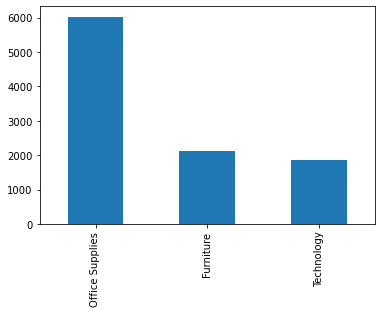

In [ ]:
data_raw["Category"].value_counts().plot(kind="bar")

<a id="ejercicios-de-practica"></a>
### Ejercicios de práctica

La base de datos `gapminder` contiene información sobre distintos índices a lo largo del tiempo en la mayoría de los países del mundo, con el fin de promover el desarrollo global y desmentir mitos comunes sobre salud.
Algunas variables de la base de datos son:
* `country`: País.
* `year`: Año.
* `infanty_mortality`: Índice de mortalidad infantil.
* `life_expectancy`: Esperanza de vida en años.
* `fertility`: Índice de fertilidad.
* `population`: Población total del país.
* `gdp`: PIB anual del país medido en dólares.
* `continent`: Continente.
* `region`: Región.

A continuación, llevará a cabo un análisis en el que investigará sobre las diferencias en la esperanza de vida y PIB de acuerdo a la ubicación geográfica de los países.  


1. Cargue la base de datos `gapminder.xlsx` usando la funcion apropiada para cargar archivos de *Excel* y muestre las primeras observaciones. Recuerde importar `pandas` con el alias `pd`.

In [ ]:
# Responda aquí:
import pandas as pd

# Subir archivo al entorno primero
data = pd.read_excel("gapminder.xlsx")
display(data.head())

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
0,Albania,1960,115.40,62.87,6.19,1636054.0,NaN,Europe,Southern Europe
1,Algeria,1960,148.20,47.50,7.65,11124892.0,1.382815e+10,Africa,Northern Africa
2,Angola,1960,208.00,35.98,7.32,5270844.0,NaN,Africa,Middle Africa
3,Antigua and Barbuda,1960,NaN,62.97,4.43,54681.0,NaN,Americas,Caribbean
4,Argentina,1960,59.87,65.39,3.11,20619075.0,1.083223e+11,Americas,South America


2. Muestre información de la base de datos con los métodos `describe` e `info`. ¿Qué aspectos destacan? ¿Y los valores faltantes?

In [ ]:
# Responda aquí:
display(data.describe().T)
data.info()

,count,mean,std,min,25%,50%,75%,max
year,10545.0,1.988000e+03,1.645273e+01,1960.00,1.974000e+03,1.988000e+03,2.002000e+03,2.016000e+03
infant_mortality,9092.0,5.530862e+01,4.772805e+01,1.50,1.600000e+01,4.150000e+01,8.510000e+01,2.769000e+02
life_expectancy,10545.0,6.481162e+01,1.067249e+01,13.20,5.750000e+01,6.754000e+01,7.300000e+01,8.390000e+01
fertility,10358.0,4.083521e+00,2.027320e+00,0.84,2.200000e+00,3.750000e+00,6.000000e+00,9.220000e+00
population,10360.0,2.701461e+07,1.066649e+08,31238.00,1.333486e+06,5.009043e+06,1.523179e+07,1.376049e+09
gdp,7573.0,1.479544e+11,6.979128e+11,40395127.89,1.845780e+09,7.794215e+09,5.539965e+10,1.174422e+13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10545 entries, 0 to 10544
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           10545 non-null  object 
 1   year              10545 non-null  int64  
 2   infant_mortality  9092 non-null   float64
 3   life_expectancy   10545 non-null  float64
 4   fertility         10358 non-null  float64
 5   population        10360 non-null  float64
 6   gdp               7573 non-null   float64
 7   continent         10545 non-null  object 
 8   region            10545 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 741.6+ KB


3. Para el análisis, no tomaremos en cuenta el índice de fertilidad ni la región. Remueva estas variables de la base de datos.

In [ ]:
# Responda aquí:
data = data.drop(columns=["fertility", "region"])
display(data.head())

,country,year,infant_mortality,life_expectancy,population,gdp,continent
0,Albania,1960,115.40,62.87,1636054.0,NaN,Europe
1,Algeria,1960,148.20,47.50,11124892.0,1.382815e+10,Africa
2,Angola,1960,208.00,35.98,5270844.0,NaN,Africa
3,Antigua and Barbuda,1960,NaN,62.97,54681.0,NaN,Americas
4,Argentina,1960,59.87,65.39,20619075.0,1.083223e+11,Americas


4. Para ser consistentes, solo consideraremos la información disponible en un solo año. Filtre la base de datos para solo conservar las observaciones del año 2011.

In [ ]:
# Responda aquí:
data2011 = data.copy().query("year == 2011")
# Otra forma: data[data["year"] == 2011]
display(data2011.head())

,country,year,infant_mortality,life_expectancy,population,gdp,continent
9435,Albania,2011,14.3,77.4,2886010.0,6.321691e+09,Europe
9436,Algeria,2011,22.8,76.1,36717132.0,8.114345e+10,Africa
9437,Angola,2011,106.8,58.1,21942296.0,2.701394e+10,Africa
9438,Antigua and Barbuda,2011,7.2,75.9,88152.0,8.017879e+08,Americas
9439,Argentina,2011,12.7,76.0,41655616.0,4.729353e+11,Americas


5. ¿Cuántos países hay en cada continente? ¿De que forma esto puede afectar el análisis?

In [ ]:
# Responda aquí:
print(data2011["continent"].value_counts())

Africa      51
Asia        47
Europe      39
Americas    36
Oceania     12
Name: continent, dtype: int64


In [ ]:
# Esto afecta en que se deberían considerar estadísticos puntuales como la media o mediana.

6. Muestre una tabla donde se diferencie el promedio de esperanza de vida en cada continente. ¿Qué es relevante en este análisis?

In [ ]:
# Responda aquí:
display(data2011.groupby("continent").agg({"life_expectancy": ["mean", "std"]}).style.background_gradient())

In [ ]:
# Es revelante que Africa fue el continente con la menor esperanza de vida, mientras que Europa fue la mayor. 

7. Para terminar, nos interesa comparar el PIB medio entre distintos contienentes. Sin embargo, esto carece de sentido ya que es de esperar que en cada país el PIB sea mayor a medida que su población lo sea. Para ello calcule el PIB per-cápita (PIB/población) de cada país y luego genere una tabla que permita calcular el PIB per-cápita medio entre continentes. Discuta sobre otra forma de comparar el PIB entre continentes.

In [ ]:
# Responda aquí:
data2011["PIB per-capita"] = data2011["gdp"] / data2011["population"]
display(data2011["PIB per-capita"].head())
display(data2011.groupby("continent").agg({"PIB per-capita": "mean"}).style.background_gradient())

9435     2190.460485
9436     2209.961500
9437     1231.135330
9438     9095.516189
9439    11353.457243
Name: PIB per-capita, dtype: float64

,PIB per-capita
continent,
Africa,1332.667353
Americas,6975.160646
Asia,8387.146407
Europe,15375.277039
Oceania,4247.453679


In [ ]:
# Otra forma:
data_agrupada = data2011.dropna().groupby("continent")
data_agrupada["gdp"].sum() / data_agrupada["population"].sum()

continent
Africa        874.111158
Americas    16664.335136
Asia         3313.985849
Europe      14868.680575
Oceania     18393.247154
dtype: float64